In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
features = utils.load('data/fma_metadata/features.csv')

features.shape

(106574, 518)

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 422.0 MB


In [4]:
features.columns.names
#Ci sono 3 livelli gerarchici di attributi (definiti con la struttura dati MultiIndex)
#Feature -> Statistics -> Number

FrozenList(['feature', 'statistics', 'number'])

In [5]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [6]:
features['chroma_cens'].head()

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20         -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

statistics                                          ...       std            \
number            07        08        09        10  ...        03        04   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.092350  0.077237   
3           1.366848  1.054094  0.108103  0.619185  ...  0.102759  0.090946   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.100257  0.072991   
10          1.770694  1.604566  0.521217  1.982386  ...  0.056647  0.118345   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.147100  0.112692   

statistics                                                              \
number            05        06        07        08        09        10   
track_id                                                                 
2           0.074284  0.077322  0.077279  0.068588  0.079606  0.085470   
3           0.075314  0.102431  0.083249  0.100854  0.089236  0.083384   
5           0.071584  0.076366  0.126677  0.131232  0.108912  0.101764   
10          0.080761  0.071630  0.083277  0.069644  0.104290  0.077502   
20          0.130581  0.126656  0.146840  0.165409  0.112400  0.157284   

statistics                      
number            11        12  
track_id                        
2           0.085498  0.098219  
3           0.079806  0.071072  
5           0.089526  0.088002  
10          0.074136  0.090781  
20          0.178552  0.137254  

[5 rows x 84 columns]

In [7]:
features['chroma_cens'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 84 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (kurtosis, 07)  106574 non-null  float64
 7   (kurtosis, 08)  106574 non-null  float64
 8   (kurtosis, 09)  106574 non-null  float64
 9   (kurtosis, 10)  106574 non-null  float64
 10  (kurtosis, 11)  106574 non-null  float64
 11  (kurtosis, 12)  106574 non-null  float64
 12  (max, 01)       106574 non-null  float64
 13  (max, 02)       106574 non-null  float64
 14  (max, 03)       106574 non-null  float64
 15  (max, 04)       106574 non-null  float64
 16  (max, 05)       106574 non-null  float64
 17  (max, 06) 

In [8]:
features.columns.get_level_values('feature').unique()

Index(['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

In [9]:
features.columns.get_level_values('statistics').unique()

Index(['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], dtype='object', name='statistics')

In [10]:
features.columns.get_level_values('number').unique()

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='number')

In [11]:
#Ogni feature ha una cardinalità di attributi 'number' diversi 
#che dipendono dal risultato restituito dalle funzioni della libreria librosa

#Ad ogni number corrisponde un array sul quale sono calcolate tutte e 7 le statistiche

In [12]:
features['chroma_cens'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 84 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (kurtosis, 07)  106574 non-null  float64
 7   (kurtosis, 08)  106574 non-null  float64
 8   (kurtosis, 09)  106574 non-null  float64
 9   (kurtosis, 10)  106574 non-null  float64
 10  (kurtosis, 11)  106574 non-null  float64
 11  (kurtosis, 12)  106574 non-null  float64
 12  (max, 01)       106574 non-null  float64
 13  (max, 02)       106574 non-null  float64
 14  (max, 03)       106574 non-null  float64
 15  (max, 04)       106574 non-null  float64
 16  (max, 05)       106574 non-null  float64
 17  (max, 06) 

In [13]:
features['chroma_cqt'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 84 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (kurtosis, 07)  106574 non-null  float64
 7   (kurtosis, 08)  106574 non-null  float64
 8   (kurtosis, 09)  106574 non-null  float64
 9   (kurtosis, 10)  106574 non-null  float64
 10  (kurtosis, 11)  106574 non-null  float64
 11  (kurtosis, 12)  106574 non-null  float64
 12  (max, 01)       106574 non-null  float64
 13  (max, 02)       106574 non-null  float64
 14  (max, 03)       106574 non-null  float64
 15  (max, 04)       106574 non-null  float64
 16  (max, 05)       106574 non-null  float64
 17  (max, 06) 

In [14]:
features['chroma_stft'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 84 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (kurtosis, 07)  106574 non-null  float64
 7   (kurtosis, 08)  106574 non-null  float64
 8   (kurtosis, 09)  106574 non-null  float64
 9   (kurtosis, 10)  106574 non-null  float64
 10  (kurtosis, 11)  106574 non-null  float64
 11  (kurtosis, 12)  106574 non-null  float64
 12  (max, 01)       106574 non-null  float64
 13  (max, 02)       106574 non-null  float64
 14  (max, 03)       106574 non-null  float64
 15  (max, 04)       106574 non-null  float64
 16  (max, 05)       106574 non-null  float64
 17  (max, 06) 

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

The chroma feature consists of twelve bands pertaining
to the musical notation of notes; C, C#, D, D#, E,
F, F#, G, G#, A, A#, B. All frequencies within
some timeframe are associated with one of these bands
and added to their band on a time scale. For example,
440 Hz is the frequency of the A note of the fourth octave, 220 Hz and 880 Hz are also an A note of a lower
and higher octave respectively. This feature does not care
about octaves. Guitar music specifically, usually plays in
the key of E, due to the fact that the lowest open string
is tuned to E. You would expect that the E and it’s minor
(G) or major (G#) third and the dominant fifth (B) to
have a high presence in the chromagram of guitar music.

In [15]:
features['mfcc'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Columns: 140 entries, ('kurtosis', '01') to ('std', '20')
dtypes: float64(140)
memory usage: 114.6 MB


The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [16]:
features['rmse'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (max, 01)       106574 non-null  float64
 2   (mean, 01)      106574 non-null  float64
 3   (median, 01)    106574 non-null  float64
 4   (min, 01)       106574 non-null  float64
 5   (skew, 01)      106574 non-null  float64
 6   (std, 01)       106574 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


Short Time Energy (STE)
The energy throughout a raw sound signal is variable and it is difficult, therefore, to accurately characterize the energy of a signal. For this, the short time energy, which is the energy from a frame, is calculated. With similar applications to ZCRs, STE is used to detect voiced-unvoiced segments, aid in music onset detection, and discriminate between source types (music, environmental, speech). The RMSE of a signal follows a similar calculation as the STE method, where RSME is instead the squart root of the mean square (the average of the squares of magnitude of the audio frames).

Root-mean-square.
Root-mean-square or rms is defined directly by the mathematical function of taking the square root of the mean of
the square of each value in the set of considered values.

Rms describes the surface area between the x-axis and the signal line which can be interpreted as the energy of the signal. A loud signal, goes high on the y-axis, will have higher rms and therefore contain more energy

In [17]:
features['spectral_bandwidth'].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (max, 01)       106574 non-null  float64
 2   (mean, 01)      106574 non-null  float64
 3   (median, 01)    106574 non-null  float64
 4   (min, 01)       106574 non-null  float64
 5   (skew, 01)      106574 non-null  float64
 6   (std, 01)       106574 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


Spectral bandwidth measures the difference between the highest and lowest frequencies within a timeframe

In [18]:
features['spectral_centroid'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (max, 01)       106574 non-null  float64
 2   (mean, 01)      106574 non-null  float64
 3   (median, 01)    106574 non-null  float64
 4   (min, 01)       106574 non-null  float64
 5   (skew, 01)      106574 non-null  float64
 6   (std, 01)       106574 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

Spectral centroid measures the weighted mean of frequencies in a signal, the weights come from the spectrogram.


In [19]:
features['spectral_centroid'].head()

statistics,kurtosis,max,mean,median,min,skew,std
number,01,01,01,01,01,01,01
track_id,,,,,,,
2,2.406808,5514.049805,1639.583252,1503.496704,0.000000,1.079815,719.770508
3,3.519866,6288.426758,1763.012451,1517.993652,0.000000,1.652693,972.758423
5,1.322586,5648.614746,1292.958130,1186.514038,0.000000,0.937101,665.319275
10,9.729688,5739.394531,1360.028687,1180.966797,0.000000,2.523783,668.700806
20,2.177669,5540.209961,1732.971802,1640.781128,123.611168,0.960959,481.929871


In [20]:
features['spectral_contrast'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 49 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (kurtosis, 07)  106574 non-null  float64
 7   (max, 01)       106574 non-null  float64
 8   (max, 02)       106574 non-null  float64
 9   (max, 03)       106574 non-null  float64
 10  (max, 04)       106574 non-null  float64
 11  (max, 05)       106574 non-null  float64
 12  (max, 06)       106574 non-null  float64
 13  (max, 07)       106574 non-null  float64
 14  (mean, 01)      106574 non-null  float64
 15  (mean, 02)      106574 non-null  float64
 16  (mean, 03)      106574 non-null  float64
 17  (mean, 04)

Spectral contrast divides the spectrogram into seven bands.
Every band contains a value representing the energy contrast, which is a function of the mean, peak (highest) and valley (lowest) energies. Higher spectral contrast signifies a clearer sound where low spectral contrast indicates
a noisier or more muddled sound.

In [21]:
features['spectral_rolloff'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (max, 01)       106574 non-null  float64
 2   (mean, 01)      106574 non-null  float64
 3   (median, 01)    106574 non-null  float64
 4   (min, 01)       106574 non-null  float64
 5   (skew, 01)      106574 non-null  float64
 6   (std, 01)       106574 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

The spectral roll-off for some frame is the frequency number below which some percentage of the spectral energy is
concentrated (85% by default).


In [22]:
features['spectral_rolloff'].head()

statistics,kurtosis,max,mean,median,min,skew,std
number,01,01,01,01,01,01,01
track_id,,,,,,,
2,0.840540,9410.009766,3267.804688,3143.847656,0.000000,0.347372,1300.729736
3,2.379145,10002.172852,3514.619629,3413.012695,0.000000,1.118952,1650.357788
5,-0.238572,9442.309570,2773.931885,2863.916016,0.000000,0.266975,1323.465210
10,3.619834,10056.005859,2603.491943,2002.587891,0.000000,1.800220,1524.401245
20,-0.744805,9496.142578,4201.346191,4166.674805,75.366211,0.160345,1495.297119


In [23]:
features['tonnetz'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (kurtosis, 02)  106574 non-null  float64
 2   (kurtosis, 03)  106574 non-null  float64
 3   (kurtosis, 04)  106574 non-null  float64
 4   (kurtosis, 05)  106574 non-null  float64
 5   (kurtosis, 06)  106574 non-null  float64
 6   (max, 01)       106574 non-null  float64
 7   (max, 02)       106574 non-null  float64
 8   (max, 03)       106574 non-null  float64
 9   (max, 04)       106574 non-null  float64
 10  (max, 05)       106574 non-null  float64
 11  (max, 06)       106574 non-null  float64
 12  (mean, 01)      106574 non-null  float64
 13  (mean, 02)      106574 non-null  float64
 14  (mean, 03)      106574 non-null  float64
 15  (mean, 04)      106574 non-null  float64
 16  (mean, 05)      106574 non-null  float64
 17  (mean, 06)

In [24]:
features['zcr'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   (kurtosis, 01)  106574 non-null  float64
 1   (max, 01)       106574 non-null  float64
 2   (mean, 01)      106574 non-null  float64
 3   (median, 01)    106574 non-null  float64
 4   (min, 01)       106574 non-null  float64
 5   (skew, 01)      106574 non-null  float64
 6   (std, 01)       106574 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

In [25]:
features['zcr'].head()

statistics,kurtosis,max,mean,median,min,skew,std
number,01,01,01,01,01,01,01
track_id,,,,,,,
2,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


## ANALISI

In [26]:
tracks = utils.load('data/fma_metadata/tracks.csv')


In [27]:
tracks['set','subset'].unique()

[small, medium, large]
Categories (3, object): [small < medium < large]

In [28]:
tracks=tracks[[('set','subset'),('track','genre_top')]]

In [29]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   (set, subset)       106574 non-null  category
 1   (track, genre_top)  49598 non-null   category
dtypes: category(2)
memory usage: 1.0 MB


In [30]:
tracks.head()

,set,track
,subset,genre_top
track_id,,
2,small,Hip-Hop
3,medium,Hip-Hop
5,small,Hip-Hop
10,small,Pop
20,large,NaN


In [31]:
mediumSet=tracks.loc[tracks[('set','subset')] != 'large']

In [32]:
mediumSet.isnull().sum()

set    subset       0
track  genre_top    0
dtype: int64

In [33]:
mediumSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   (set, subset)       25000 non-null  category
 1   (track, genre_top)  25000 non-null  category
dtypes: category(2)
memory usage: 245.0 KB


In [34]:
mediumSet=pd.concat([mediumSet], axis=1, keys=['metadata']).swaplevel(1, 1, 1)
mediumSet.head()

metadata          
              set     track
           subset genre_top
track_id                   
2           small   Hip-Hop
3          medium   Hip-Hop
5           small   Hip-Hop
10          small       Pop
134        medium   Hip-Hop

In [35]:
mediumSet=mediumSet.rename_axis(columns=["feature","statistics","number"])

mediumSet.head()

feature    metadata          
statistics      set     track
number       subset genre_top
track_id                     
2             small   Hip-Hop
3            medium   Hip-Hop
5             small   Hip-Hop
10            small       Pop
134          medium   Hip-Hop

In [91]:
DBMERGE= pd.merge(mediumSet, features, left_index=True, right_index=True)
DBMERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Columns: 520 entries, ('metadata', 'set', 'subset') to ('zcr', 'std', '01')
dtypes: category(2), float64(518)
memory usage: 99.0 MB


In [92]:
DBMERGE.head()

feature    metadata           chroma_cens                                \
statistics      set     track    kurtosis                                 
number       subset genre_top          01        02        03        04   
track_id                                                                  
2             small   Hip-Hop    7.180653  5.230309  0.249321  1.347620   
3            medium   Hip-Hop    1.888963  0.760539  0.345297  2.295201   
5             small   Hip-Hop    0.527563 -0.077654 -0.279610  0.685883   
10            small       Pop    3.702245 -0.291193  2.196742 -0.234449   
134          medium   Hip-Hop    0.918445  0.674147  0.577818  1.281117   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            05        06        07        08  ...        04        05   
track_id                                            ...                       
2           1.482478  0.531371  1.481593  2.691455  ...  0.054125  0.012226   
3           1.654031  0.067592  1.366848  1.054094  ...  0.063831  0.014212   
5           1.937570  0.880839 -0.923192 -0.927232  ...  0.040730  0.012691   
10          1.367364  0.998411  1.770694  1.604566  ...  0.074358  0.017952   
134         0.933746  0.078177  1.199204 -0.175223  ...  0.058766  0.016322   

feature                     zcr                                               \
statistics             kurtosis       max      mean    median  min      skew   
number            06         01        01        01        01   01        01   
track_id                                                                       
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.0  2.089872   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.0  1.716724   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.0  2.193303   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.0  3.542325   
134         0.015819   4.731087  0.419434  0.064370  0.050781  0.0  1.806106   

feature               
statistics       std  
number            01  
track_id              
2           0.061448  
3           0.069330  
5           0.044861  
10          0.040800  
134         0.054623  

[5 rows x 520 columns]

In [95]:
DBMERGE.to_csv('data/fma_metadata/DBMERGEfeatures.csv', index = True)


In [38]:
DBMERGE.columns.get_level_values('feature').unique()

Index(['metadata', 'chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

In [39]:
DBMERGE['metadata','track','genre_top'].value_counts()

Rock                   7103
Electronic             6314
Experimental           2251
Hip-Hop                2201
Folk                   1519
Instrumental           1350
Pop                    1186
International          1018
Classical               619
Old-Time / Historic     510
Jazz                    384
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
Name: (metadata, track, genre_top), dtype: int64

In [40]:
DBMERGE=DBMERGE.drop([('metadata', 'set','subset')], axis = 1)
DBMERGE.head()

feature     metadata chroma_cens                                          \
statistics     track    kurtosis                                           
number     genre_top          01        02        03        04        05   
track_id                                                                   
2            Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3            Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5            Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10               Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134          Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            06        07        08        09  ...        04        05   
track_id                                            ...                       
2           0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
3           0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
5           0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
10          0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
134         0.078177  1.199204 -0.175223  0.925482  ...  0.058766  0.016322   

feature                     zcr                                               \
statistics             kurtosis       max      mean    median  min      skew   
number            06         01        01        01        01   01        01   
track_id                                                                       
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.0  2.089872   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.0  1.716724   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.0  2.193303   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.0  3.542325   
134         0.015819   4.731087  0.419434  0.064370  0.050781  0.0  1.806106   

feature               
statistics       std  
number            01  
track_id              
2           0.061448  
3           0.069330  
5           0.044861  
10          0.040800  
134         0.054623  

[5 rows x 519 columns]

In [41]:


DBGenre=DBMERGE.groupby([('metadata','track','genre_top')],as_index=False).mean()


In [42]:
DBGenre.head()

feature           metadata chroma_cens                                \
statistics           track    kurtosis                                 
number           genre_top          01        02        03        04   
0                    Blues    0.175807  0.015692  0.199885 -0.116845   
1                Classical   -0.490072 -0.601888 -0.575599 -0.579444   
2                  Country   -0.007966 -0.228756  0.102906 -0.092496   
3           Easy Listening   -0.293479 -0.279681 -0.181914 -0.259518   
4               Electronic    0.140148  0.046782  0.305312  0.079655   

feature                                                       ...   tonnetz  \
statistics                                                    ...       std   
number            05        06        07        08        09  ...        04   
0           0.108659 -0.087766  0.222688  0.324092 -0.011618  ...  0.100228   
1          -0.484779 -0.506867 -0.547507 -0.493637 -0.553731  ...  0.144806   
2          -0.035075  0.031562  0.014681  0.031407 -0.209747  ...  0.102276   
3          -0.191752  0.009313  1.103853 -0.010950 -0.037183  ...  0.114827   
4           0.109177  0.168200  0.082979  0.223935  0.085744  ...  0.092680   

feature                               zcr                                \
statistics                       kurtosis       max      mean    median   
number            05        06         01        01        01        01   
0           0.021210  0.021969  20.156730  0.410770  0.047991  0.038686   
1           0.029908  0.029865  46.866736  0.295583  0.035602  0.031229   
2           0.020342  0.020504  24.125427  0.415752  0.056131  0.049508   
3           0.023672  0.024789  22.064663  0.388300  0.043663  0.035435   
4           0.020740  0.021077  22.148990  0.428921  0.053919  0.040244   

feature                                   
statistics       min      skew       std  
number            01        01        01  
0           0.002217  3.012493  0.041093  
1           0.002239  4.121846  0.025109  
2           0.003103  3.365169  0.039105  
3           0.002441  3.279631  0.037855  
4           0.001243  3.032589  0.049984  

[5 rows x 519 columns]

## chroma_cens - kurtosis

In [43]:
chroma_cens_Kurtosis=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'kurtosis'])]

In [44]:
chroma_cens_Kurtosis.head()

feature           metadata chroma_cens                                \
statistics           track    kurtosis                                 
number           genre_top          01        02        03        04   
0                    Blues    0.175807  0.015692  0.199885 -0.116845   
1                Classical   -0.490072 -0.601888 -0.575599 -0.579444   
2                  Country   -0.007966 -0.228756  0.102906 -0.092496   
3           Easy Listening   -0.293479 -0.279681 -0.181914 -0.259518   
4               Electronic    0.140148  0.046782  0.305312  0.079655   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.108659 -0.087766  0.222688  0.324092 -0.011618  0.092223   
1          -0.484779 -0.506867 -0.547507 -0.493637 -0.553731 -0.615589   
2          -0.035075  0.031562  0.014681  0.031407 -0.209747 -0.047944   
3          -0.191752  0.009313  1.103853 -0.010950 -0.037183 -0.045727   
4           0.109177  0.168200  0.082979  0.223935  0.085744  0.121183   

feature                         
statistics                      
number            11        12  
0          -0.097152  0.010320  
1          -0.553061 -0.549808  
2           0.032337 -0.106275  
3          -0.028747 -0.010642  
4           0.297090  0.259487

In [45]:
chroma_cens_Kurtosis=chroma_cens_Kurtosis.droplevel(0, axis=1)
chroma_cens_Kurtosis=chroma_cens_Kurtosis.droplevel(0, axis=1)


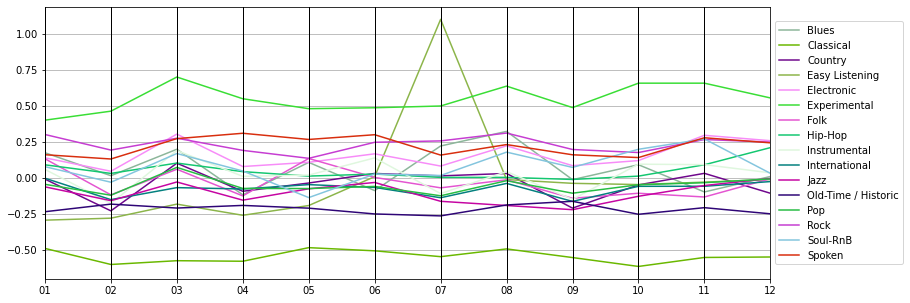

In [46]:
pd.plotting.parallel_coordinates(
    chroma_cens_Kurtosis, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [47]:
chroma_cens_Kurtosis['mean'] = chroma_cens_Kurtosis.mean(axis=1)
chroma_cens_Kurtosis.head()

number,genre_top,01,02,03,04,05,06,07,08,09,10,11,12,mean
0,Blues,0.175807,0.015692,0.199885,-0.116845,0.108659,-0.087766,0.222688,0.324092,-0.011618,0.092223,-0.097152,0.010320,0.069665
1,Classical,-0.490072,-0.601888,-0.575599,-0.579444,-0.484779,-0.506867,-0.547507,-0.493637,-0.553731,-0.615589,-0.553061,-0.549808,-0.545998
2,Country,-0.007966,-0.228756,0.102906,-0.092496,-0.035075,0.031562,0.014681,0.031407,-0.209747,-0.047944,0.032337,-0.106275,-0.042947
3,Easy Listening,-0.293479,-0.279681,-0.181914,-0.259518,-0.191752,0.009313,1.103853,-0.010950,-0.037183,-0.045727,-0.028747,-0.010642,-0.018869
4,Electronic,0.140148,0.046782,0.305312,0.079655,0.109177,0.168200,0.082979,0.223935,0.085744,0.121183,0.297090,0.259487,0.159974


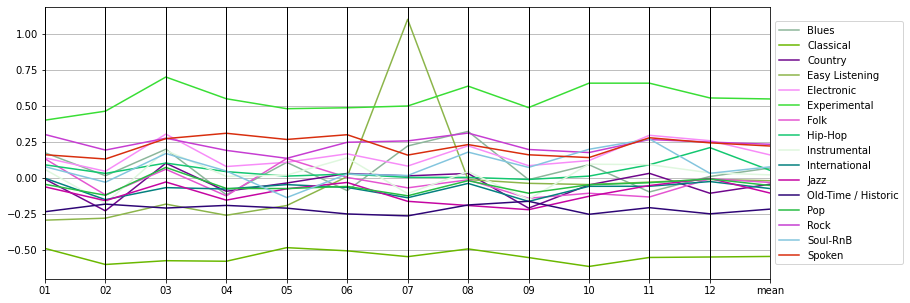

In [48]:
pd.plotting.parallel_coordinates(
    chroma_cens_Kurtosis, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - max

In [49]:
chroma_cens_max=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'max'])]

In [50]:
chroma_cens_max.head()

feature           metadata chroma_cens                                \
statistics           track         max                                 
number           genre_top          01        02        03        04   
0                    Blues    0.635823  0.625186  0.643452  0.614077   
1                Classical    0.667225  0.641126  0.662320  0.641554   
2                  Country    0.618567  0.597293  0.633302  0.582405   
3           Easy Listening    0.654643  0.618670  0.616938  0.592589   
4               Electronic    0.630688  0.586089  0.600671  0.584083   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.646386  0.633384  0.632574  0.656376  0.620629  0.660712   
1           0.646833  0.648825  0.638220  0.661722  0.635347  0.652046   
2           0.642943  0.593407  0.595943  0.639115  0.588716  0.638980   
3           0.619271  0.596219  0.570122  0.600594  0.591569  0.630678   
4           0.595236  0.594732  0.579814  0.609201  0.586966  0.595837   

feature                         
statistics                      
number            11        12  
0           0.631195  0.634981  
1           0.642949  0.641289  
2           0.590404  0.623064  
3           0.608350  0.599780  
4           0.580319  0.581450

In [51]:
chroma_cens_max=chroma_cens_max.droplevel(0, axis=1)
chroma_cens_max=chroma_cens_max.droplevel(0, axis=1)
chroma_cens_max['mean'] = chroma_cens_max.mean(axis=1)

chroma_cens_max.head()

number,genre_top,01,02,03,04,05,06,07,08,09,10,11,12,mean
0,Blues,0.635823,0.625186,0.643452,0.614077,0.646386,0.633384,0.632574,0.656376,0.620629,0.660712,0.631195,0.634981,0.636231
1,Classical,0.667225,0.641126,0.662320,0.641554,0.646833,0.648825,0.638220,0.661722,0.635347,0.652046,0.642949,0.641289,0.648288
2,Country,0.618567,0.597293,0.633302,0.582405,0.642943,0.593407,0.595943,0.639115,0.588716,0.638980,0.590404,0.623064,0.612012
3,Easy Listening,0.654643,0.618670,0.616938,0.592589,0.619271,0.596219,0.570122,0.600594,0.591569,0.630678,0.608350,0.599780,0.608285
4,Electronic,0.630688,0.586089,0.600671,0.584083,0.595236,0.594732,0.579814,0.609201,0.586966,0.595837,0.580319,0.581450,0.593757


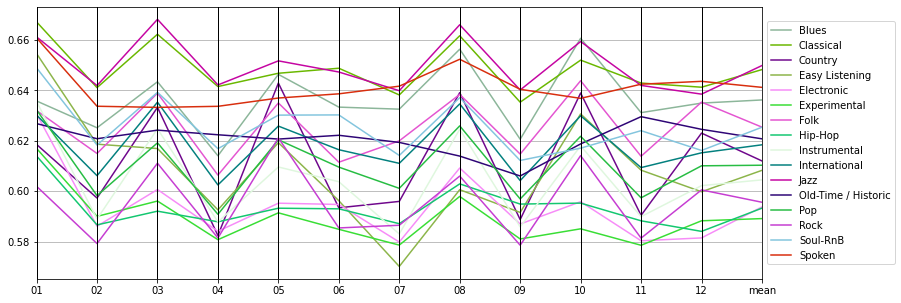

In [52]:
pd.plotting.parallel_coordinates(
    chroma_cens_max, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - mean

In [53]:
chroma_cens_mean=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'mean'])]

In [54]:
chroma_cens_mean.head()

feature           metadata chroma_cens                                \
statistics           track        mean                                 
number           genre_top          01        02        03        04   
0                    Blues    0.240502  0.248316  0.248608  0.250726   
1                Classical    0.243581  0.241300  0.243162  0.239088   
2                  Country    0.243107  0.244628  0.252739  0.266639   
3           Easy Listening    0.275772  0.262772  0.238126  0.244075   
4               Electronic    0.268143  0.257713  0.248889  0.249112   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.254972  0.249488  0.243494  0.242709  0.246851  0.250777   
1           0.234201  0.228526  0.230675  0.236792  0.232465  0.229204   
2           0.277288  0.246457  0.241705  0.255966  0.256402  0.244767   
3           0.246239  0.223470  0.221056  0.233535  0.234388  0.231498   
4           0.251196  0.245376  0.247984  0.256735  0.254172  0.242022   

feature                         
statistics                      
number            11        12  
0           0.245306  0.234797  
1           0.226536  0.227250  
2           0.238081  0.248300  
3           0.221420  0.219060  
4           0.225979  0.222542

In [55]:
chroma_cens_mean=chroma_cens_mean.droplevel(0, axis=1)
chroma_cens_mean=chroma_cens_mean.droplevel(0, axis=1)
chroma_cens_mean['mean'] = chroma_cens_mean.mean(axis=1)


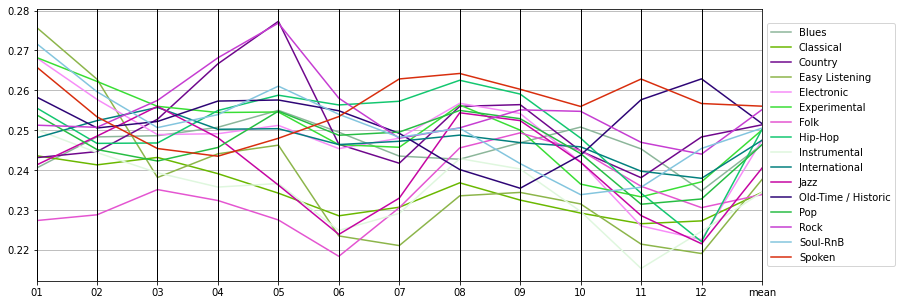

In [56]:
pd.plotting.parallel_coordinates(
    chroma_cens_mean, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - median

In [57]:
chroma_cens_median=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'median'])]

In [58]:
chroma_cens_median.head()

feature           metadata chroma_cens                                \
statistics           track      median                                 
number           genre_top          01        02        03        04   
0                    Blues    0.228430  0.242558  0.236384  0.242658   
1                Classical    0.230808  0.234416  0.231164  0.231404   
2                  Country    0.232141  0.235499  0.237311  0.261555   
3           Easy Listening    0.259494  0.250563  0.228099  0.234973   
4               Electronic    0.260506  0.253197  0.240645  0.242123   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.242085  0.236800  0.230781  0.226791  0.237969  0.234847   
1           0.221279  0.214725  0.221470  0.222396  0.222904  0.214631   
2           0.269402  0.238894  0.232570  0.243528  0.250349  0.230128   
3           0.234560  0.208943  0.209841  0.222125  0.229742  0.213041   
4           0.243247  0.236901  0.241938  0.249468  0.249356  0.232534   

feature                         
statistics                      
number            11        12  
0           0.237062  0.218894  
1           0.212589  0.214393  
2           0.229478  0.238798  
3           0.192826  0.203027  
4           0.216837  0.211961

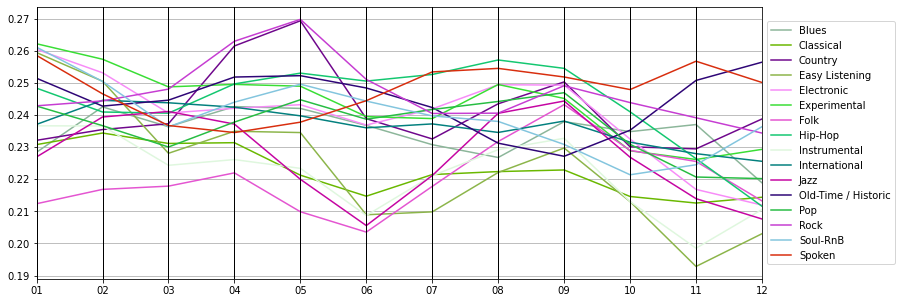

In [59]:
chroma_cens_median=chroma_cens_median.droplevel(0, axis=1)
chroma_cens_median=chroma_cens_median.droplevel(0, axis=1)
chroma_cens_mean['mean'] = chroma_cens_mean.mean(axis=1)

pd.plotting.parallel_coordinates(
    chroma_cens_median, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - min

In [60]:
chroma_cens_min=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'min'])]

In [61]:
chroma_cens_min.head()

feature           metadata chroma_cens                                \
statistics           track         min                                 
number           genre_top          01        02        03        04   
0                    Blues    0.001086  0.000966  0.000776  0.000905   
1                Classical    0.000082  0.000208  0.000698  0.001076   
2                  Country    0.005507  0.004474  0.004494  0.007726   
3           Easy Listening    0.000729  0.007617  0.001568  0.000302   
4               Electronic    0.009311  0.009155  0.007587  0.007565   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.000408  0.002165  0.001537  0.001818  0.001031  0.000870   
1           0.000387  0.000312  0.000702  0.000361  0.000463  0.000116   
2           0.005531  0.003654  0.001280  0.002357  0.005232  0.004876   
3           0.006728  0.001240  0.000464  0.000950  0.004885  0.000028   
4           0.007287  0.006797  0.006906  0.006991  0.006657  0.005249   

feature                         
statistics                      
number            11        12  
0           0.000252  0.000919  
1           0.000505  0.000451  
2           0.006033  0.002722  
3           0.010404  0.001991  
4           0.004382  0.004434

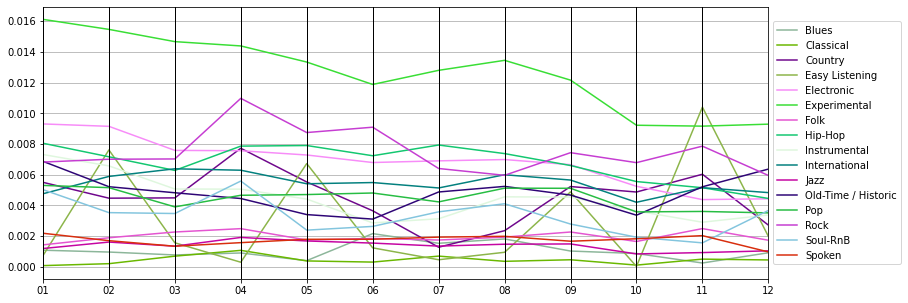

In [62]:
chroma_cens_min=chroma_cens_min.droplevel(0, axis=1)
chroma_cens_min=chroma_cens_min.droplevel(0, axis=1)

pd.plotting.parallel_coordinates(
    chroma_cens_min, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - skew

In [63]:
chroma_cens_skew=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'skew'])]

In [64]:
chroma_cens_skew.head()

feature           metadata chroma_cens                                \
statistics           track        skew                                 
number           genre_top          01        02        03        04   
0                    Blues    0.364396  0.222778  0.384199  0.173469   
1                Classical    0.277694  0.164679  0.262764  0.208572   
2                  Country    0.353462  0.199084  0.416308  0.056916   
3           Easy Listening    0.288403  0.263188  0.306918  0.234535   
4               Electronic    0.226443  0.131254  0.271841  0.197681   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.355249  0.278520  0.366063  0.484232  0.242304  0.386663   
1           0.282945  0.328297  0.245662  0.324135  0.239456  0.316232   
2           0.203257  0.173538  0.230484  0.353308  0.061375  0.415087   
3           0.312573  0.400604  0.581295  0.445731  0.324660  0.460538   
4           0.237756  0.269789  0.185891  0.242147  0.152176  0.288560   

feature                         
statistics                      
number            11        12  
0           0.197273  0.429005  
1           0.323645  0.295215  
2           0.265580  0.288790  
3           0.474258  0.516558  
4           0.343044  0.382448

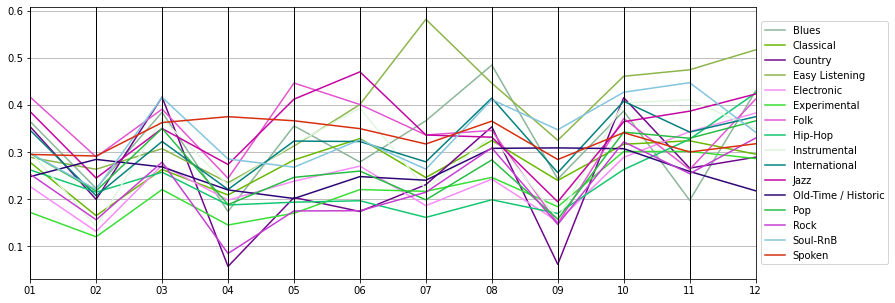

In [65]:
chroma_cens_skew=chroma_cens_skew.droplevel(0, axis=1)
chroma_cens_skew=chroma_cens_skew.droplevel(0, axis=1)

pd.plotting.parallel_coordinates(
    chroma_cens_skew, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## chroma_cens - std

In [66]:
chroma_cens_std=DBGenre.loc[:, (['metadata', 'chroma_cens'], ['track', 'std'])]

In [67]:
chroma_cens_std.head()

feature           metadata chroma_cens                                \
statistics           track         std                                 
number           genre_top          01        02        03        04   
0                    Blues    0.129611  0.124362  0.132642  0.123441   
1                Classical    0.159702  0.150056  0.161242  0.151241   
2                  Country    0.124871  0.120225  0.131574  0.112535   
3           Easy Listening    0.149239  0.135476  0.128406  0.131967   
4               Electronic    0.126865  0.118030  0.122051  0.118273   

feature                                                                 \
statistics                                                               
number            05        06        07        08        09        10   
0           0.135701  0.128358  0.126455  0.131686  0.124973  0.139000   
1           0.153502  0.154824  0.148946  0.159484  0.149175  0.159150   
2           0.133368  0.116218  0.118616  0.134399  0.116295  0.135133   
3           0.137955  0.131413  0.132267  0.140244  0.130690  0.144484   
4           0.121391  0.121390  0.118035  0.124646  0.120421  0.124794   

feature                         
statistics                      
number            11        12  
0           0.125225  0.133504  
1           0.155741  0.154156  
2           0.113743  0.126524  
3           0.138260  0.136585  
4           0.118253  0.118973

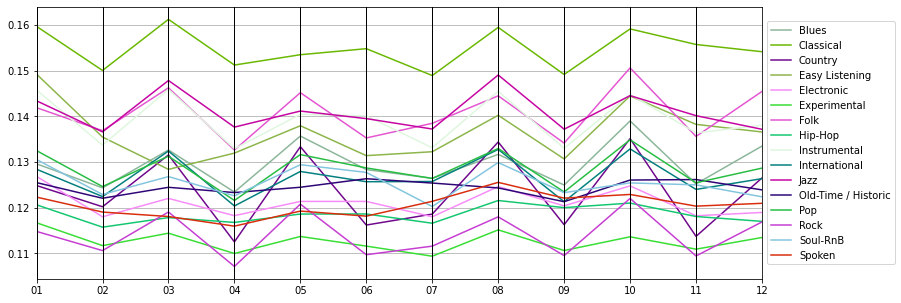

In [68]:
chroma_cens_std=chroma_cens_std.droplevel(0, axis=1)
chroma_cens_std=chroma_cens_std.droplevel(0, axis=1)

pd.plotting.parallel_coordinates(
    chroma_cens_std, ( 'genre_top')
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [69]:
DBGenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Columns: 519 entries, ('metadata', 'track', 'genre_top') to ('zcr', 'std', '01')
dtypes: category(1), float64(518)
memory usage: 65.6 KB


In [70]:
DBGenre.columns.get_level_values('feature').unique()

Index(['metadata', 'chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

## chroma correlation

In [71]:
chroma_Kurtosis=DBGenre.loc[:, (['metadata','chroma_cens', 'chroma_cqt','chroma_stft'], ['track', 'kurtosis','kurtosis','kurtosis'])]

In [72]:
chroma_Kurtosis.head()

feature           metadata chroma_cens                                \
statistics           track    kurtosis                                 
number           genre_top          01        02        03        04   
0                    Blues    0.175807  0.015692  0.199885 -0.116845   
1                Classical   -0.490072 -0.601888 -0.575599 -0.579444   
2                  Country   -0.007966 -0.228756  0.102906 -0.092496   
3           Easy Listening   -0.293479 -0.279681 -0.181914 -0.259518   
4               Electronic    0.140148  0.046782  0.305312  0.079655   

feature                                                       ... chroma_stft  \
statistics                                                    ...    kurtosis   
number            05        06        07        08        09  ...          03   
0           0.108659 -0.087766  0.222688  0.324092 -0.011618  ...   -0.650967   
1          -0.484779 -0.506867 -0.547507 -0.493637 -0.553731  ...    0.059473   
2          -0.035075  0.031562  0.014681  0.031407 -0.209747  ...   -0.600228   
3          -0.191752  0.009313  1.103853 -0.010950 -0.037183  ...   -0.452566   
4           0.109177  0.168200  0.082979  0.223935  0.085744  ...   -0.634910   

feature                                                                 \
statistics                                                               
number            04        05        06        07        08        09   
0          -0.690222 -0.623642 -0.476983 -0.444385 -0.482076 -0.505835   
1           0.300944  0.436225  0.458405  0.467626  0.156170  0.361848   
2          -0.463061 -0.759454 -0.327929 -0.475378 -0.626746 -0.479888   
3          -0.251223 -0.745103 -0.120339  0.029217 -0.648105 -0.429820   
4          -0.601430 -0.684162 -0.519286 -0.433800 -0.465824 -0.472080   

feature                                   
statistics                                
number            10        11        12  
0          -0.677661 -0.484201 -0.658853  
1           0.183861  0.267109  0.390501  
2          -0.671398 -0.221400 -0.522557  
3          -0.480941 -0.298191 -0.205664  
4          -0.591928 -0.531874 -0.619071  

[5 rows x 37 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5]),
 <a list of 36 Text major ticklabel objects>)

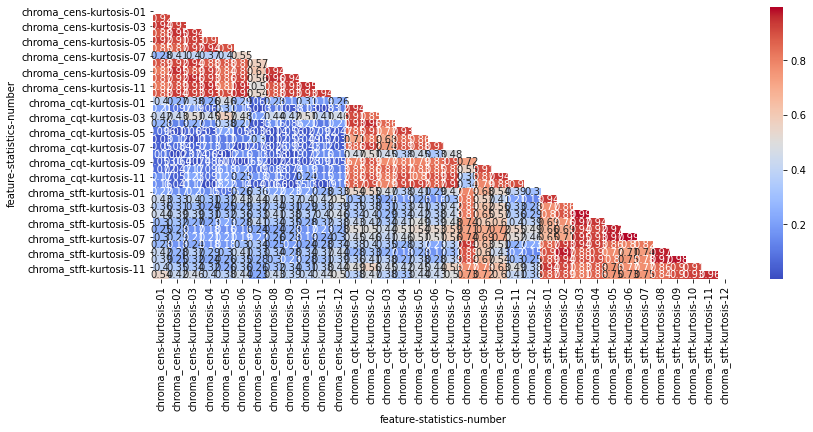

In [73]:
corr=chroma_Kurtosis.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


In [74]:
chroma_Kurtosis_1_2=DBGenre.loc[:, (['metadata','chroma_cens', 'chroma_cqt'], ['track', 'kurtosis','kurtosis'])]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 <a list of 24 Text major ticklabel objects>)

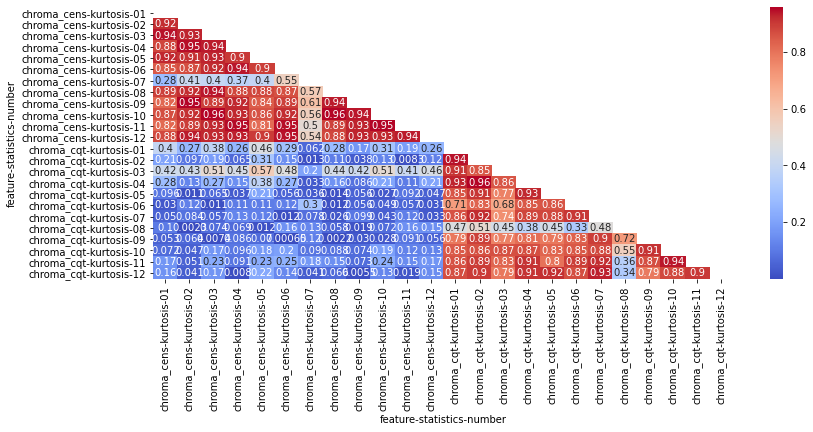

In [75]:
corr=chroma_Kurtosis_1_2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


In [76]:
chroma_Kurtosis_1_3=DBGenre.loc[:, (['metadata','chroma_cens', 'chroma_stft'], ['track', 'kurtosis','kurtosis'])]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 <a list of 24 Text major ticklabel objects>)

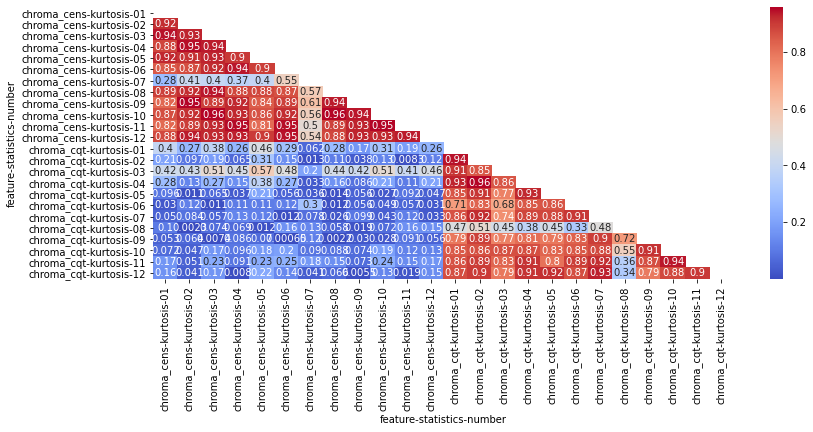

In [77]:
corr=chroma_Kurtosis_1_2.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder


In [79]:
DBMERGE

feature         metadata chroma_cens                                          \
statistics         track    kurtosis                                           
number         genre_top          01        02        03        04        05   
track_id                                                                       
2                Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3                Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5                Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10                   Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134              Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...                  ...         ...       ...       ...       ...       ...   
155297      Instrumental   -0.007668  0.104604 -0.511487  0.857308  0.266202   
155298              Folk   -0.956019 -0.961210 -0.447053 -0.689531 -0.633071   
155306              Folk    0.644815 -0.879404 -1.149232 -0.655986 -0.848881   
155307      Experimental   -0.446937  1.235004 -0.250855 -0.612224 -1.197387   
155314              Rock   -0.121936 -0.348523 -0.555810 -0.607600 -0.823013   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            06        07        08        09  ...        04        05   
track_id                                            ...                       
2           0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
3           0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
5           0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
10          0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
134         0.078177  1.199204 -0.175223  0.925482  ...  0.058766  0.016322   
...              ...       ...       ...       ...  ...       ...       ...   
155297     -0.355186 -0.273640 -0.324727 -0.106368  ...  0.141844  0.024080   
155298     -0.430116 -0.031147 -0.758652 -1.093452  ...  0.177286  0.028411   
155306     -0.672240  0.193149  0.069103 -0.179058  ...  0.125615  0.027110   
155307     -1.118230  0.716520 -0.878211 -0.637801  ...  0.099894  0.019141   
155314     -0.369621 -0.573967  0.554874 -0.905412  ...  0.089492  0.019214   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
134         0.015819   4.731087  0.419434  0.064370  0.050781  0.000000   
...              ...        ...       ...       ...       ...       ...   
155297      0.031020  70.604774  0.850586  0.034100  0.020996  0.001953   
155298      0.025631  45.445824  0.303711  0.024058  0.019531  0.000000   
155306      0.028815  17.076239  0.247070  0.031542  0.025879  0.004883   
155307      0.033045   6.458911  0.344727  0.069199  0.063477  0.001953   
155314      0.018619   8.916731  0.227051  0.042894  0.039551  0.006348   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
134         1.806106  0.054623  
...              ...       ...  
155297      8.380918  0.088828  
155298      5.786194  0.023428  
155306      3.179079  0.022023  
155307      1.996085  0.043098  
155314      1.989080  0.0

In [80]:

attributes = [col for col in DBMERGE.columns if col != ('metadata','track','genre_top')]
X = DBMERGE[attributes].values
y = DBMERGE[('metadata','track','genre_top')]

In [81]:
sel = VarianceThreshold(threshold=(0.01))
X_train_sel = sel.fit_transform(X)

X_train_sel.shape

(25000, 352)

In [82]:
sel=SelectKBest(k=1)
X_sel=sel.fit_transform(X,y)

In [83]:
DF=DBMERGE.drop([('metadata', 'track','genre_top')], axis = 1)

In [84]:
feat_importance=dict(zip(DF.columns,sel.scores_))

In [85]:
sel.scores_

array([2.04615635e+01, 2.92414164e+01, 3.89349929e+00, 1.15600856e+01,
       1.67285590e+01, 1.39800718e+01, 2.70691286e+01, 1.82942631e+01,
       2.62657206e+01, 2.14069886e+01, 7.84662575e+00, 1.68089307e+01,
       6.36986137e+01, 6.24978305e+01, 7.15530870e+01, 5.14299496e+01,
       6.72192947e+01, 5.26411672e+01, 6.21987074e+01, 5.80176967e+01,
       5.31248352e+01, 7.32043411e+01, 6.37928082e+01, 7.11383374e+01,
       3.46355637e+01, 2.11050178e+01, 1.29519137e+01, 4.36731123e+01,
       6.52721174e+01, 4.83574635e+01, 1.99554409e+01, 1.04296393e+01,
       1.22582078e+01, 1.68406350e+01, 3.61014381e+01, 3.39384428e+01,
       3.57811679e+01, 2.28512969e+01, 1.55763647e+01, 4.13904454e+01,
       6.45939546e+01, 5.47932243e+01, 2.11357188e+01, 1.51531507e+01,
       1.22920803e+01, 1.54330238e+01, 3.57696820e+01, 3.06668893e+01,
       2.99182790e+01, 2.82404996e+01, 2.61660590e+01, 2.90822385e+01,
       2.60597861e+01, 2.70865049e+01, 2.66325642e+01, 2.43782739e+01,
      

In [86]:
feat_importance

{('chroma_cens', 'kurtosis', '01'): 20.46156353355033,
 ('chroma_cens', 'kurtosis', '02'): 29.24141641071257,
 ('chroma_cens', 'kurtosis', '03'): 3.8934992860852766,
 ('chroma_cens', 'kurtosis', '04'): 11.560085613808157,
 ('chroma_cens', 'kurtosis', '05'): 16.728558988292857,
 ('chroma_cens', 'kurtosis', '06'): 13.98007179936684,
 ('chroma_cens', 'kurtosis', '07'): 27.069128606776765,
 ('chroma_cens', 'kurtosis', '08'): 18.294263051124336,
 ('chroma_cens', 'kurtosis', '09'): 26.265720649330657,
 ('chroma_cens', 'kurtosis', '10'): 21.40698860449529,
 ('chroma_cens', 'kurtosis', '11'): 7.846625754412348,
 ('chroma_cens', 'kurtosis', '12'): 16.808930660331498,
 ('chroma_cens', 'max', '01'): 63.69861370867771,
 ('chroma_cens', 'max', '02'): 62.49783047622246,
 ('chroma_cens', 'max', '03'): 71.55308698270295,
 ('chroma_cens', 'max', '04'): 51.42994958518961,
 ('chroma_cens', 'max', '05'): 67.21929467867332,
 ('chroma_cens', 'max', '06'): 52.64116720604791,
 ('chroma_cens', 'max', '07'): 62

In [87]:
DF.columns[sel.get_support()]

MultiIndex([('mfcc', 'mean', '04')],
           names=['feature', 'statistics', 'number'])